# Basic Image Processing.
Following: https://docs.opencv.org/4.10.0/d3/df2/tutorial_py_basic_ops.html

Acknowlegement: Cat image by André Karwath aka Aka - Own work, CC BY-SA 2.5, https://commons.wikimedia.org/w/index.php?curid=217417

In [ ]:

%pip install matplotlib
%pip3 install opencv-python
%pip install numpy


In [8]:
import sys
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt


Load an image first. To get the shape of the image, you can use the shape command like below.
Note that this is a color image, therefore the number of channels is 3 each correponding to blue, green and red channels.

In [16]:

img = cv2.imread("cat.jpg")
print ("Gives the shape of the image (height, width, channels): ", img.shape)
print ("Get a particular pixel value at location x= 60, y=60: ", img[60,60])



Gives the shape of the image (height, width, channels):  (533, 800, 3)
Get a particular pixel value at location x= 60, y=60:  [167 183 195]


OpenCV returns  an image in BGR format and not RGB - an array of Blue, Green, Red values. Therefore to get the intensity values for the corresponding channels, you'll need to use the following :
Blue : img[ :, :, 0]
Green : img[:, :, 1]
Red : img[:, :, 2]

In [17]:
print ("Get blue pixel at x=60, y=60: ", img[60,60,0])
print ("Get green pixel at x=60, y=60: ", img[60,60,1])
print ("Get red pixel at x=60, y=60: ", img[60,60,2])

Get blue pixel at x=60, y=60:  167
Get green pixel at x=60, y=60:  183
Get red pixel at x=60, y=60:  195


Other ways of accessing and modifying pixel values

In [12]:
print("Get red pixel at x=60, y=60: ", img.item(60,60,2))
img[60,60,2]= 100# Modifying the red pixel value
print("Changed red pixel at x=60, y=60: ", img.item(60,60,2))

Get red pixel at x=60, y=60:  195
Changed red pixel at x=60, y=60:  100


Let's copy the image and we'll d some fun color processing.
But first let's display the image. I'm using a function display_image(image1) to convert the BGR format of OpenCV to RGB for displaying on screen

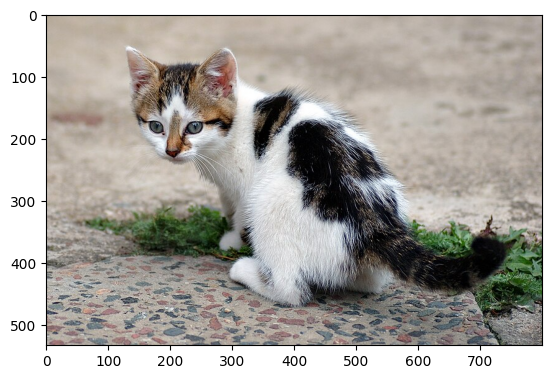

In [18]:
## Function to display image
def display_image(image1):
    image = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB) ##BGR to RGB conversion for display using Matplotlib
    plt.imshow(image)
    plt.show()

display_image(img) # original image

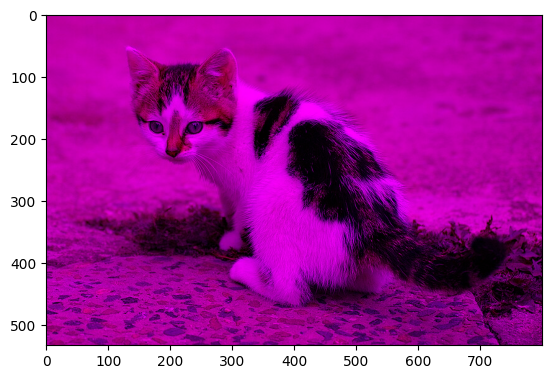

In [ ]:
imgCopy = img.copy() # make a copy of the image for processing.
imgCopy[:,:, 1] = 0 ## making all pixels in the green channel 0, meaning we are removing the green channel.

display_image(imgCopy) ## displaying the image after zeroing the green channel

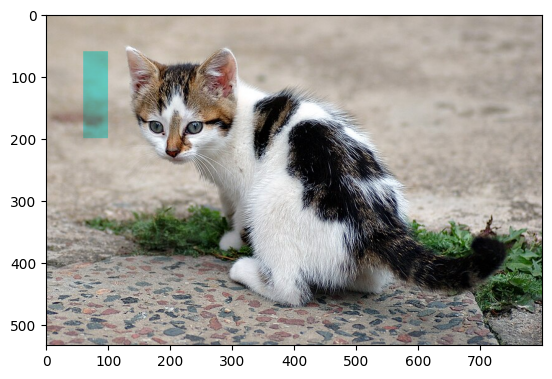

In [21]:
## Modifying intensity of a block of pixels in the red channel. 
imgCopy2 = img.copy() # copy of the original image
imgCopy2[60:200, 60:100, 2] = 100

## Display the image:
display_image(imgCopy2)

Converting color image to grayscale and checking the number of channels


Shape & Size & Type:  (533, 800) 426400 uint8


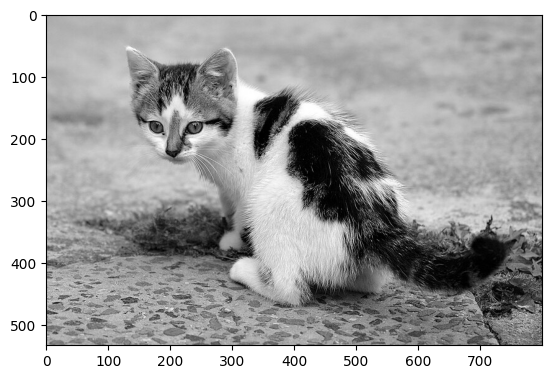

In [26]:
imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print ("Shape & Size & Type: ", imgGray.shape, imgGray.size, imgGray.dtype)
display_image(imgGray)

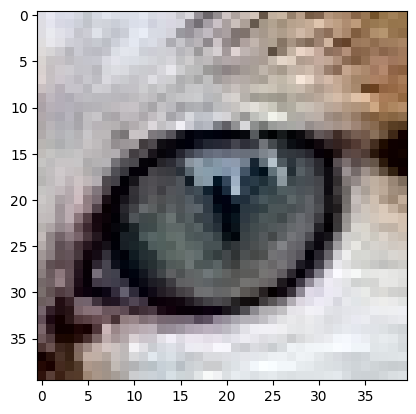

In [30]:
img_roi = img[160:200, 220:260]
display_image(img_roi)